# Guided Project: Storytelling Data Visualization on Exchange Rates

## Introducing the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [4]:
exchange_rates.head(5)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


## Data Cleaning

In [5]:
exchange_rates= exchange_rates.rename(columns = {'Period\\Unit:':'Time','[US dollar ]':'USD'})
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time',inplace= True)
exchange_rates.reset_index(inplace= True)

In [6]:
euro_to_dollar  = exchange_rates[['Time','USD']]

In [7]:
euro_to_dollar  = exchange_rates[['Time','USD']]
euro_to_dollar = euro_to_dollar[~(euro_to_dollar['USD'] == '-')]
euro_to_dollar['USD'] = euro_to_dollar['USD'].astype('float')
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    5637 non-null   datetime64[ns]
 1   USD     5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Rolling Mean

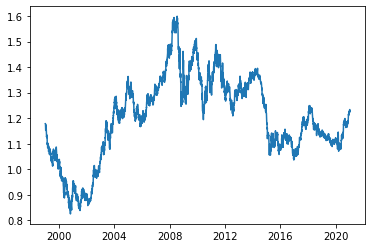

In [8]:
plt.plot(euro_to_dollar['Time'],euro_to_dollar['USD'])
plt.show()

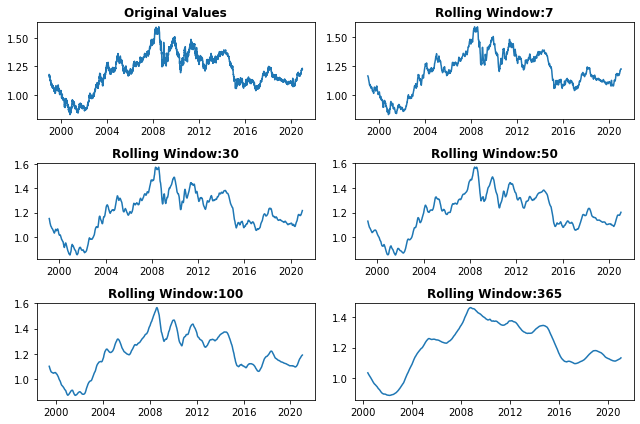

In [9]:
plt.figure(figsize=(9,6))
rolling_size= [7,30,50,100,365]
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'],euro_to_dollar['USD'])
plt.title('Original Values',weight = 'bold')
for i,v in enumerate(rolling_size):
    plt.subplot(3,2,i+2)
    plt.plot(euro_to_dollar['Time'],euro_to_dollar['USD'].rolling(v).mean())
    plt.title('Rolling Window:' + str(v),weight = 'bold')

plt.tight_layout()
plt.show()

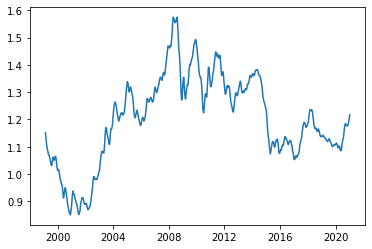

In [10]:
euro_to_dollar['Rolling_mean'] = euro_to_dollar['USD'].rolling(30).mean()
plt.plot(euro_to_dollar['Time'],euro_to_dollar['Rolling_mean'])
plt.show()

In [14]:
euro_to_dollar['Year'] = euro_to_dollar['Time'].dt.year
euro_to_dollar

,Time,USD,Rolling_mean,Year
0,1999-01-04,1.1789,NaN,1999
1,1999-01-05,1.1790,NaN,1999
2,1999-01-06,1.1743,NaN,1999
3,1999-01-07,1.1632,NaN,1999
4,1999-01-08,1.1659,NaN,1999
...,...,...,...,...
5694,2021-01-04,1.2296,1.211170,2021
5695,2021-01-05,1.2271,1.212530,2021
5696,2021-01-06,1.2338,1.213987,2021
5697,2021-01-07,1.2276,1.215357,2021



Coming Up With an Idea

Here are a few story ideas for our data:

   - We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
   - We show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. We can use a line plot.
   - We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.



## 2007-2008's FInancial crisis 

In [51]:
e2d_2006_10= euro_to_dollar[euro_to_dollar['Year'].between(2006,2009)].copy()
e2d_2007_8 = euro_to_dollar[euro_to_dollar['Year'].between(2007,2008)].copy()



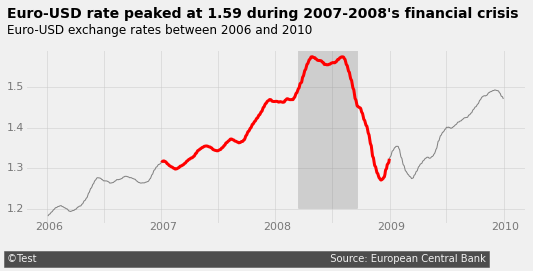

In [117]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')
fig, ax = plt.subplots( figsize=(8, 3))
ax.plot(e2d_2006_10['Time'],e2d_2006_10['Rolling_mean'],color= 'grey',linewidth = 1)
ax.plot(e2d_2007_8['Time'],e2d_2007_8['Rolling_mean'],color= 'red',linewidth=3)

### Highlihting the peak of the crisis
ax.axvspan(xmin=13950, xmax=14140, ymin=0.09,
           alpha=0.3, color='grey')

ax.set_yticklabels([])
ax.set_xticklabels([])

x = 13110
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.15, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13020, y, rate, alpha=0.5, fontsize=11)
    y += 0.1
    
    
### Adding a title and a subtitle    
ax.text(13020, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(13020, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(13020, 1.07, '©Sample' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

## The Three US Presidencies Example

In [111]:
bush = euro_to_dollar[euro_to_dollar['Year'].between(2001,2008)].copy()
obama = euro_to_dollar[euro_to_dollar['Year'].between(2009,2016)].copy()
trump = euro_to_dollar[euro_to_dollar['Year'].between(2017,2022)].copy() 
bush_obama_trump = euro_to_dollar[euro_to_dollar['Year'].between(2006,2022)].copy()


<ipython-input-118-b440e991589b>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '','2007', '', '2009'],alpha = 0.3)
<ipython-input-118-b440e991589b>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
<ipython-input-118-b440e991589b>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',


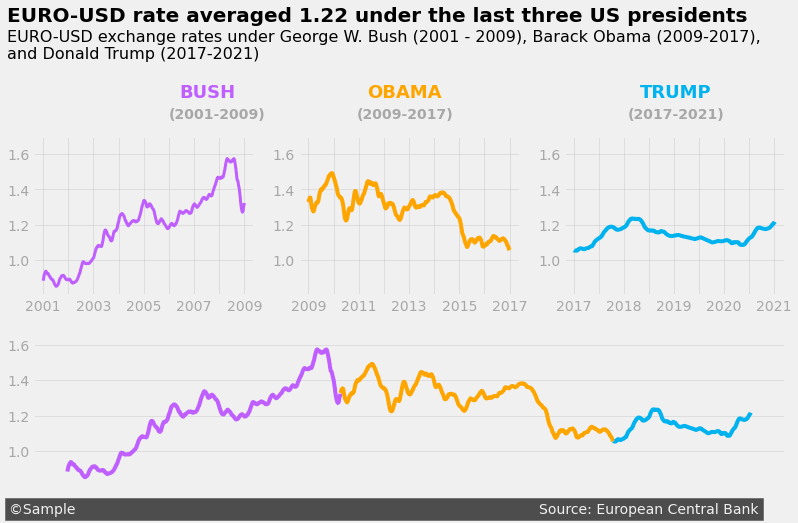

In [118]:
fig = plt.subplots( figsize=(12,6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5) 
    

#Axis1 Bush
ax1.plot(bush['Time'],bush['Rolling_mean'],color='#BF5FFF',linewidth = 3)
ax1.grid(alpha=0.5)
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '','2007', '', '2009'],alpha = 0.3)
ax1.text(13300, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(13150, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)



### Ax2: Obama
ax2.plot(obama['Time'], obama['Rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(15100, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(14950, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['Time'], trump['Rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(17650, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(17560, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)


### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['Rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['Rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['Rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(10800, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(10800, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

### Adding a signature
ax4.text(10700, 0.65, '©Sample' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()




## Visualize Euro to Indian Rupee  exchange Rates

In [154]:
exchange_rates= exchange_rates.rename(columns = {'Period\\Unit:':'Time','[Indian rupee ]':'INR'})
Euro_to_rupee = exchange_rates[['Time','INR']].copy()

Euro_to_rupee= Euro_to_rupee[Euro_to_rupee['INR'].notnull()]
Euro_to_rupee= Euro_to_rupee[Euro_to_rupee['INR']!='-']
Euro_to_rupee['INR']= Euro_to_rupee['INR'].astype(float)


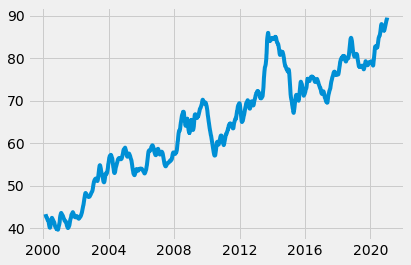

In [167]:
plt.plot(Euro_to_rupee['Time'],Euro_to_rupee['INR'].rolling(30).mean())
plt.show()

## Rolling mean 

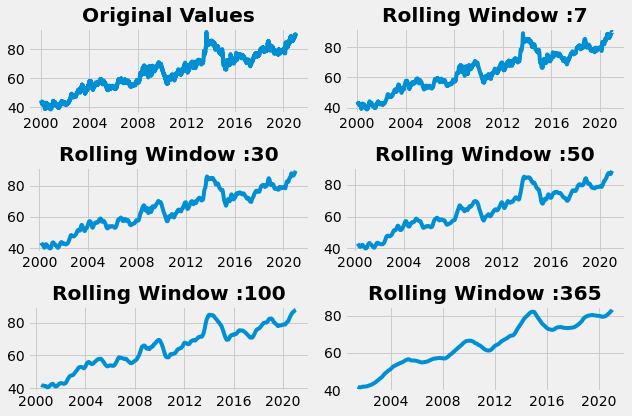

In [164]:
plt.figure(figsize= (9,6))
plt.subplot(3,2,1)
plt.plot(Euro_to_rupee['Time'],Euro_to_rupee['INR'])
plt.title('Original Values', weight= 'bold')
for i, r_mean in enumerate([7,30,50,100,365]):
    plt.subplot(3,2,i+2)
    plt.plot(Euro_to_rupee['Time'],Euro_to_rupee['INR'].rolling(r_mean).mean())
    plt.title('Rolling Window :'+str(r_mean),weight= 'bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()